<b> MIS 382N: ADVANCED MACHINE LEARNING<b>

Assignment 5

Total points: 55

Due:  to be submitted via Canvas by 11:59 pm, Mon Nov 21st.

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

**Additionally, upload any images you plan to incorporate in your notebook as attachments so we can see them in case the uploaded images don't appear properly on our end.**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Juhi Patel

EID: jpp2464

# Question 1: Ensemble Methods [10 pts]
Read this [article](https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db) on different boosting methods. Briefly describe the main advantages and disadvantages of  CatBoost as compared to XGBoost.

#Answer: CatBoost has flexibility of giving indices of categorical columns so that it can be encodes as one-hot encoding. CatBoost can have best accuracy, minimum overfitting and minimum prediction and tunimg time when catergorical variables and tuned one_hot_max_size. CatBoost performs well only when we have categorical variables in the data and we propertly tune them. Much faster than XGboost.

In XGboost cannot handle categorical features by itslef, it only accepts numberical values. This one has to perform various encodings like label encoding. XGboost can be too slow - it can be hard to tune the paramaters. 

# Question 2 : Ensemble Methods for Classification [25 pts]

We look at the following dataset [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) for this question. The dataset is extremely large so for this question we only consider a subset of the data which has been provided along with the notebook for this assignment.
The task is to predict the probability that someone will experience financial distress in the next two years. The dataset has already been split into train and test sets.

In [1]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [2]:
import pandas as pd

data = pd.read_csv('hw5_data.csv')

data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.571373,66,0,0.430620,9274.0,10,0,1,0,0.0
1,0,0.233999,56,0,0.257380,5656.0,12,0,0,0,0.0
2,0,0.299270,33,0,0.114575,4747.0,8,0,0,0,3.0
3,0,0.032165,41,0,0.308326,8490.0,8,0,1,0,0.0
4,0,0.050591,36,0,0.862627,3333.0,8,0,2,0,0.0


In [70]:
from sklearn.model_selection import train_test_split
y = data['SeriousDlqin2yrs']

X = data.drop(['SeriousDlqin2yrs'],axis=1)

# traina and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

print('training data values',X_train.shape,y_train.shape) # training
print('testing data values',X_test.shape,y_test.shape) # testing

training data values (3750, 10) (3750,)
testing data values (1250, 10) (1250,)


In this question, we will compare performance of different ensemble methods for classification problems: [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html), [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) Classifiers.

a) **[2.5 pts]** Use a Decision Tree Classifier with random_state = 14 for the classification problem. Report the accuracy_score and roc_auc_score on the test data for the classifier.

b) **[2.5 pts]** Create an ensemble of 25 classifiers (i.e n_estimators = 25) with random_state = 14 for [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) with base classifier as Decision Tree Classifier from part a). Report accuracy_score and roc_auc_score on the test data for the Bagging classifiers. 

c) **[5 pts]** Use the training data and build a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model for the classification problem. Find the best parameters (including *n_estimators*, *max_features* and *criterion*) using [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Report the optimal parameters obtained by GridSearch. Report the confusion matrix  and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on test data using the model fit with best parameters.

d) **[5 pts]** Use [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for this problem. Again, find the best parameters (including *n_estimators, learning_rate*), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data.

e) **[5 pts]** Use [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) for this problem. Again, find the best parameters (including *n_estimators, learning_rate*), and report the confusion matrix and roc_auc_score on test data for the classifier fit with best parameters found using training data.

f) **[5 pts]** Compare the performance of decision tree from part a) with the ensemble methods, Briefly explain which of the three ensemble method performed better and why?

In [26]:
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from time import time

# import matplotlib.pyplot as plt
# from sklearn.model_selection import (train_test_split,GridSearchCV)
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import (accuracy_score,roc_auc_score)
# from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
# from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import confusion_matrix
# from sklearn import metrics
# from time import time

import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
!pip install xgboost
import xgboost


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [80]:
# PART A)

classification_tree = DecisionTreeClassifier(random_state=14).fit(X_train, y_train)

print('roc_auc_score: %.3f' % roc_auc_score(y_test, classification_tree.predict_proba(X_test)[:, 1]))
print('accuracy_score: %.3f' % accuracy_score(y_test, classification_tree.predict(X_test)))

roc_auc_score: 0.585
accuracy_score: 0.888


In [72]:
# PART B

#accuracy_score and roc_auc_score

classification_bagging = BaggingClassifier(n_estimators=25, random_state=14).fit(X_train, y_train)
print('roc_auc_score: %.3f' % roc_auc_score(y_test, classification_bagging.predict_proba(X_test)[:, 1]))
print('accuracy_score: %.3f' % accuracy_score(y_test, classification_bagging.predict(X_test)))

roc_auc_score: 0.786
accuracy_score: 0.926


In [79]:
# PART C)

clf = RandomForestClassifier()

param_grid = {"n_estimators": [1, 10, 50, 100],
              "max_features": [1, 5, 10, "auto"],
              "criterion": ['gini','entropy'],
              "random_state": [17]}

# Grid search
classifier_grid_search = GridSearchCV(estimator=clf, param_grid=param_grid)
classifier_grid_search.fit(X_train, y_train)
classifier_grid_search.best_params_


{'criterion': 'entropy',
 'max_features': 1,
 'n_estimators': 100,
 'random_state': 17}

roc_auc_score: 0.837


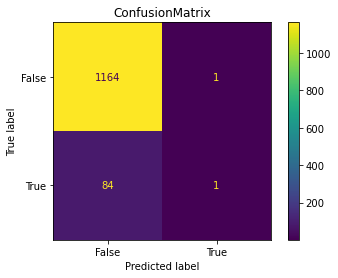

In [75]:
random_forest_classifier = RandomForestClassifier(random_state=17, max_features=1, n_estimators= 100, max_depth=8, criterion='entropy')
random_forest_classifier.fit(X_train, y_train)

print('roc_auc_score: %.3f' % roc_auc_score(y_test, rfc1.predict_proba(X_test)[:, 1]))

confusion_matrix = metrics.confusion_matrix(y_test, random_forest_classifier.predict(X_test))
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm.plot()
plt.title("ConfusionMatrix")
plt.show()

In [54]:
# PART D)

clf = AdaBoostClassifier()

paramater_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search
grid = GridSearchCV(estimator=adclass, param_grid=param_grid)
grid.fit(X_train, y_train)
grid.best_params_


{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}

roc_auc_score: 0.837


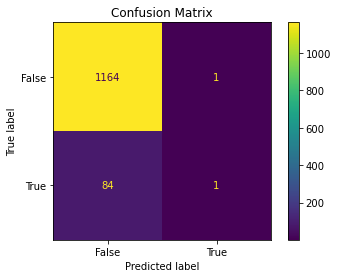

In [76]:
adaboost1 = AdaBoostClassifier(random_state=17, learning_rate=0.1, n_estimators= 100)
adaboost1.fit(X_train, y_train)
print('roc_auc_score: %.3f' % roc_auc_score(y_test, rfc1.predict_proba(X_test)[:, 1]))

confusion_matrix = metrics.confusion_matrix(y_test, rfc1.predict(X_test))
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm.plot()
plt.title("Confusion Matrix")
plt.show()

In [81]:
# PART E)

clf = GradientBoostingClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search
grid = GridSearchCV(estimator=clf, param_grid=param_grid)
grid.fit(X_train, y_train)
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 10, 'random_state': 17}

AUROC: 0.837


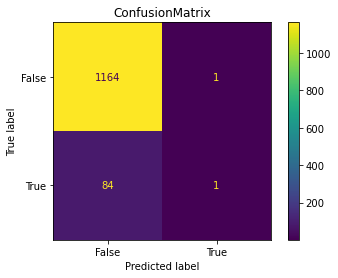

In [92]:
gradboost = GradientBoostingClassifier(random_state=17, learning_rate=0.1, n_estimators= 10)
gradboost.fit(X_train, y_train)

print('AUROC: %.3f' % roc_auc_score(y_test, gradboost.predict_proba(X_test)[:, 1]))

confusion_matrix = metrics.confusion_matrix(y_test, gradboost.predict(X_test))
x = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

x.plot()
plt.title("ConfusionMatrix")
plt.show()

# Part f)

Ensemble methods can combine a plethora of decision trees to product improved predictive performance. This is better than using a single decision tree. The main idea is that if you had a group of learners that were weak they can come together to form a strong learning performance. 

Ensemble methods are better to use than decision trees when the auroc is being used and considered. Random forest is usually the best choice of performance when it comes to ensemble methods becuase it can easily be tuned and trainied. We can buld the tree independently. 

## Question 3: XGBoost on Datasets with varying Class Imbalance [15 points]

You are given three datasets (all extracted from the [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit) dataset which was used in the last question). They have varying levels of class imbalance (positive to negative class ratio):
1. dataset_equally_biased_final has a class ratio of 1:1
2. dataset_originally_biased_final has a class ratio of 1:15
3. dataset_highly_biased_final has a class ratio of 1:39

Use [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html) on these three datasets and plot the [calibration curves](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html#sklearn.calibration.calibration_curve) for your predictions. Examine both uniform and quantile binning strategies for your plots and observe how the plots look. For which of the datasets is you model calibrated the best? Which of the binning strategies provide more informative visualization for each of the datasets?

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

In [60]:
from sklearn.model_selection import train_test_split
import pandas as pd

dataset = pd.read_csv("data_equally_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Balanced Dataset")
# Number of classes in training Data
print(y_train1.value_counts())
# Number of classes in test Data
print(y_test1.value_counts())

dataset = pd.read_csv("data_originally_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Originally Imbalanced Dataset")
# Number of classes in training Data
print(y_train2.value_counts())
# Number of classes in test Data
print(y_test2.value_counts())

dataset = pd.read_csv("data_highly_biased_final.csv")
X = dataset.drop(['SeriousDlqin2yrs'], axis=1)
y = dataset['SeriousDlqin2yrs']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
print("Highly Imbalanced Dataset")
# Number of classes in training Data
print(y_train3.value_counts())
# Number of classes in test Data
print(y_test3.value_counts())

Balanced Dataset
0    4000
1    4000
Name: SeriousDlqin2yrs, dtype: int64
0    1000
1    1000
Name: SeriousDlqin2yrs, dtype: int64
Originally Imbalanced Dataset
0    7466
1     534
Name: SeriousDlqin2yrs, dtype: int64
0    1866
1     134
Name: SeriousDlqin2yrs, dtype: int64
Highly Imbalanced Dataset
0    7800
1     200
Name: SeriousDlqin2yrs, dtype: int64
0    1950
1      50
Name: SeriousDlqin2yrs, dtype: int64


In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score,roc_auc_score)
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import (train_test_split,GridSearchCV)
from sklearn.ensemble import (RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier)
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from time import time
import xgboost

%matplotlib inline

In [91]:
# Using the earlier dataset and applying XGBoost on it

clf = xgboost.XGBClassifier()

param_grid = {"n_estimators": [10, 100],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)

# Balanced Dataset
print("Balanced Dataset")
grid_search.fit(X_train1, y_train1)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train1, y_train1)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt1 = clf.predict(X_test1)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test1, y_pred_gbt1))

y_pred_proba1 = clf.predict_proba(X_test1)[:,1]

acc_score = accuracy_score(y_test1,y_pred_gbt1)
auc_score = roc_auc_score(y_test1,y_pred_proba1)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))


# Originally Imbalanced Dataset

print("Originally Imbalanced Dataset")
grid_search.fit(X_train2, y_train2)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train2, y_train2)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt2 = clf.predict(X_test2)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test2, y_pred_gbt2))

y_pred_proba2 = clf.predict_proba(X_test2)[:,1]

acc_score = accuracy_score(y_test2,y_pred_gbt2)
auc_score = roc_auc_score(y_test2,y_pred_proba2)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))

# Highly Imalanced Dataset

print("Highly Imbalanced Dataset")
grid_search.fit(X_train3, y_train3)
print(grid_search.best_params_)
clf.set_params(**grid_search.best_params_)

t0 = time()
clf.fit(X_train3, y_train3)
print("training time", round(time()-t0, 3), "s")

t0 = time()
y_pred_gbt3 = clf.predict(X_test3)
print("predict time", round(time()-t0, 3), "s")

print("XGBoost conf matrix: ")
print(confusion_matrix(y_test3, y_pred_gbt3))

y_pred_proba3 = clf.predict_proba(X_test3)[:,1]

acc_score = accuracy_score(y_test3,y_pred_gbt3)
auc_score = roc_auc_score(y_test3,y_pred_proba3)
print("Accuracy: {}\n AUC_ROC: {}\n".format(acc_score,auc_score))

Balanced Dataset
{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 17}
training time 0.484 s
predict time 0.005 s
XGBoost conf matrix: 


TypeError: 'numpy.ndarray' object is not callable

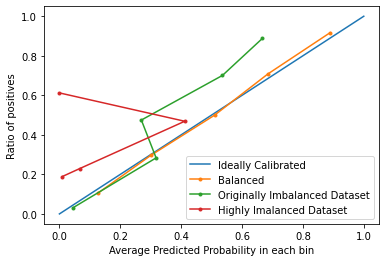

In [90]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

#Plot all calibration curves for strategy = 'uniform' (It is uniform by default)
p_1, p_2 = calibration_curve(y_test1, y_pred_proba1)
p_3, p_4 = calibration_curve(y_test2, y_pred_proba2)
p_5, p_6 = calibration_curve(y_test3, y_pred_proba3)

plt.plot([0, 1], [0, 1], linestyle = '-', label = 'Ideally Calibrated')
 
plt.plot(p_1, p_2, marker = '.', label = 'Balanced')
plt.plot(p_3, p_4, marker = '.', label = 'Originally Imbalanced Dataset')
plt.plot(p_5, p_6, marker = '.', label = 'Highly Imalanced Dataset')
 
leg = plt.legend(loc = 'lower right')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

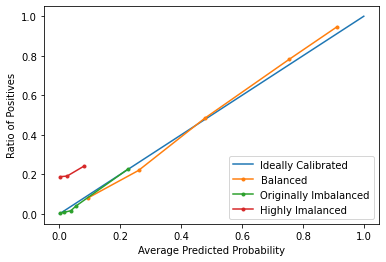

In [87]:
#Plot all calibration curves for strategy = 'quantile'
from sklearn.calibration import calibration_curve
p_1, p_2 = calibration_curve(y_test1, y_pred_proba1, strategy='quantile' )
p_3, p_4 = calibration_curve(y_test2, y_pred_proba2, strategy='quantile')
p_5, p_6 = calibration_curve(y_test3, y_pred_proba3, strategy='quantile')

plt.plot([0, 1], [0, 1], linestyle = '-', label = 'Ideally Calibrated')
 
plt.plot(p_1, p_2, marker = '.', label = 'Balanced')
plt.plot(p_3, p_4, marker = '.', label = 'Originally Imbalanced')
plt.plot(p_5, p_6, marker = '.', label = 'Highly Imalanced')
 
x = plt.legend(loc = 'lower right')
plt.xlabel('Average Predicted Probability')
plt.ylabel('Ratio of Positives')
plt.show()

For which of the datasets is you model calibrated the best? Which of the binning strategies provide more informative visualization for each of the datasets?

#Question 4: Deep Learning Mechanisms [5 points]

Briefly explain the motivation behind the following mechanisms commonly used in deep learning: <br>
a) **[2.5 pts]** Skip connections <br>
b) **[2.5 pts]** Batch normalization

#Answer:

a. Skip connections are when some layers of the neural network are skipped and is able to use the output of one layer as the input of the next layer. When there are short skip connections they usually stabilize the gradient. They are able to use feautre reasibility to stabilize the training and convergance. 

b. Batch normalization is used for training a deep neural networks. This allows the normalization of the contributions to a layer for every mini-batch. This can be beneficial because it will decrease the number of training epochs required to train the deep neural networks. 